site de dataset : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

##### 1- importation de dataset
##### 2- pretraitement des donnees & visualization
##### 3- entrainement de model
##### 4- prediction 
##### 5- test our model with another dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('churn-bigml-80.csv')

print(df.info())
print(df.describe().T)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2- pretraitement des donnees & visualization

In [4]:
df['International plan']= df['International plan'].replace(['No','Yes'],[0,1])
df['Voice mail plan']= df['Voice mail plan'].replace(['No','Yes'],[0,1])

df.rename(columns={'Churn':'Label'}, inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Label
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
encoder = LabelEncoder()
encoder.fit(df.Label)
df['Label'] = encoder.transform(df.Label)

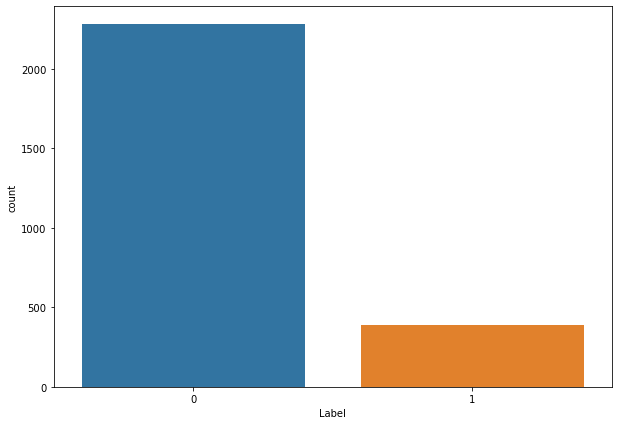

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["Label"],data=df) 
plt.show()

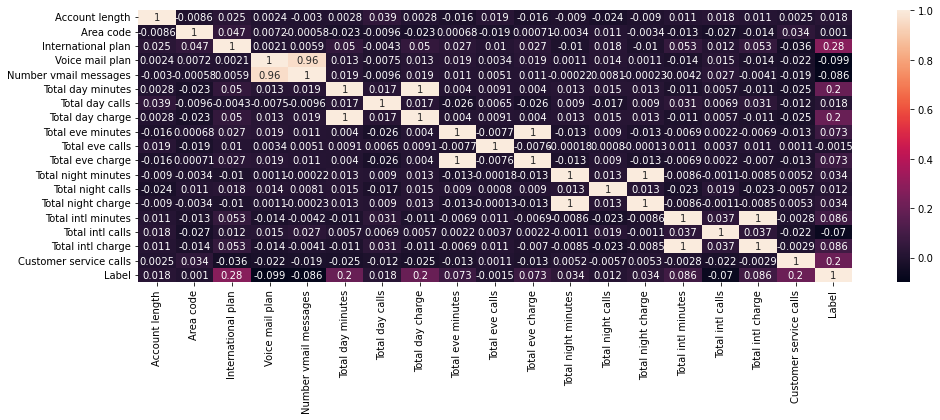

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# drop useless columns
df = df.drop(['State','Account length','Total eve calls',
                   'Total night calls','Total day calls','Total day calls','Total intl calls'], axis=1)

In [9]:
df.head()

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Label
0,415,0,1,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,0
1,415,0,1,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,0
2,415,0,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,0
3,408,1,0,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,0
4,415,1,0,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,0


# 3- entrainemet de model

In [11]:
x = df.drop(columns='Label') #select our features
y = df.Label.values # select the output

In [12]:
#split data into train_data, test_data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=101)

In [16]:
# applying random forest classifier algorithm
model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
model.fit(X_train, y_train)

RandomForestClassifier()

# 4- prediction

In [18]:
# display accuracy
print('accuracy score : ',round(accuracy_score(y_test, y_pred),2))
print('\n')
print('classification repport : \n',classification_report(y_test, y_pred))

accuracy score :  0.93


classification repport : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       441
           1       0.97      0.63      0.77        93

    accuracy                           0.93       534
   macro avg       0.95      0.81      0.86       534
weighted avg       0.93      0.93      0.93       534



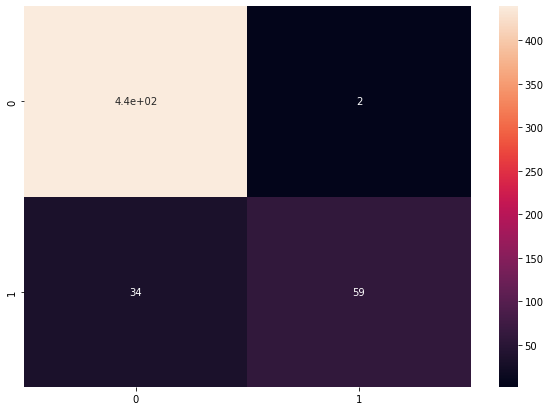



[[439   2]
 [ 34  59]]


In [15]:
# CONFUSION MATRIX
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
print('\n')
print(confusion_matrix(y_test, y_pred))

# 5- test our model with another dataset

In [47]:
data2test = pd.read_csv('churn-bigml-20.csv')

In [48]:
# drop unused columns
data2test = data2test.drop(['State','Account length','Total eve calls',
                   'Total night calls','Total day calls','Total day calls','Total intl calls'], axis=1)

# convert object values to numeric type
data2test['International plan']= data2test['International plan'].replace(['No','Yes'],[0,1])
data2test['Voice mail plan']= data2test['Voice mail plan'].replace(['No','Yes'],[0,1])

In [49]:
print(data2test.head())
print(data2test.info())

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn
0,408,0,0,0,184.5,31.37,351.6,29.89,215.8,9.71,8.7,2.35,1,False
1,415,0,0,0,129.1,21.95,228.5,19.42,208.8,9.40,12.7,3.43,4,True
2,415,0,0,0,332.9,56.59,317.8,27.01,160.6,7.23,5.4,1.46,4,True
3,415,0,0,0,110.4,18.77,137.3,11.67,189.6,8.53,7.7,2.08,2,False
4,510,0,0,0,119.3,20.28,215.1,18.28,178.7,8.04,11.1,3.00,1,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area code               667 non-null    int64  
 1   International plan      667 non-null    int64  
 2   Voice mail plan         667 non-null    int64  
 3   Number vmail messages   667 non-null    int64  
 4   Total day minutes       667 non-null    float64
 5   Total day charge        667 non-null    float64
 6   Total eve minutes       667 non-null    float64
 7   Total eve charge        667 non-null    float64
 8   Total night minutes     667 non-null    float64
 9   Total night charge      667 non-null    float64
 10  Total intl minutes      667 non-null    float64
 11  Total intl charge       667 non-null    float64
 12  Customer service calls  667 non-null    int64  
 13  Churn                   667 non-null    bool   
dtypes: bool(1), float64(8), int64(5)
memory us

None

In [50]:
Output = data2test.Churn
data2test = data2test.drop(columns='Churn')

In [67]:
prediction_total = model.predict(data2test)
print('accuracy score pour le 2eme set est : ',accuracy_score(Output, prediction_total))
confusion_matrix(Output, prediction_total)

accuracy score pour le 2eme set est :  0.9460269865067467


array([[567,   5],
       [ 31,  64]], dtype=int64)

In [79]:
nb = random.randrange(0,len(data2test)+1)
random_rows =  data2test.iloc[nb:nb+1]
prediction = model.predict(random_rows)
print(random_rows)

pred = True
if prediction[0] == 0 : pred = False

print('\n')
print('la valeur predictee est : ', pred)
print('la valeur reel est : ',Output.iloc[nb])

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls
472,408,0,0,0,101.4,17.24,249.1,21.17,157.6,7.09,7.1,1.92,1




la valeur predictee est :  False
la valeur reel est :  False
